In [88]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree

model = DecisionTreeClassifier()

In [90]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split

def clean_data(df,target_column,test_data_size):
    # Replace "?" with NaN
    df = df.replace('?', np.nan)
    X = df.drop(columns=[target_column])
    y = df[target_column]
    # Define the feature columns and the transformers for each column type
    numeric_features = X.select_dtypes(include=['number']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Create the final pipeline, including preprocessing
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    X = pipeline.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_data_size)

    return X_train, X_test, y_train, y_test, pipeline



In [91]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split

def clean_data2(X):
    # Replace "?" with NaN

    # Define the feature columns and the transformers for each column type
    numeric_features = X.select_dtypes(include=['number']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Create the final pipeline, including preprocessing
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('svc', DecisionTreeClassifier())
    ])

    # X = pipeline.fit_transform(X)
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_data_size)
    return pipeline



In [92]:
file = pd.read_csv(r'C:\Users\ss\Desktop\ml\datasets\processed.cleveland.data')
file.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","hd",]
print(file)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak   
0    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5  \
1    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
2    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
3    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
4    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
298  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
299  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
300  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
301  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  hd  
0      2.0  3.0  3.0   2

In [113]:
file_label = file.columns[1]
# df = file.replace('?', np.nan)
df_no_missing = file.loc[(file['ca'] != "?") & (file['thal'] != "?")]

X = df_no_missing.drop('hd',axis=1).copy()
y = df_no_missing['hd'].copy()
pipeline = clean_data2(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

pipeline.fit(X_train,y_train)
test_data_score = pipeline.score(X_test,y_test)
test_data_score

# plot_tree(pipeline)


0.5730337078651685

In [99]:
li = []
for i,f in enumerate(file.columns) :
    if i != 1:
        li.append(f)
print(li)

['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']


In [101]:
# data = ['Finland','Western Europe',7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.430,1.446,1.106,0.741,0.691,0.124,0.481,3.253]
data = [['Western Europe',0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.430,1.446,1.106,0.741,0.691,0.124,0.481,3.253]]

# columns=np.array(li)
data = pd.DataFrame(data,columns=X.columns)
print(data)
# data = pipeline.transform([data])
pipeline.predict(data)

ValueError: 13 columns passed, passed data had 18 columns

InvalidIndexError: (slice(None, None, None), 0)

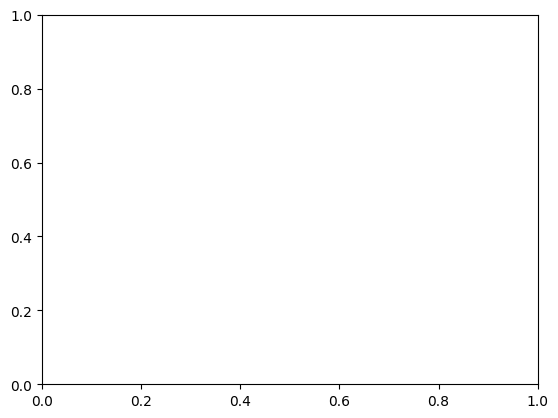

In [102]:
import matplotlib.pyplot as plt
from scipy.special import expit

def plot_decision_boundaries(X, y, clf, title=None):
    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out

    fig, ax = plt.subplots()
    # title for the plots
    if title == None:
        title = clf.__class__.__name__
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('y label here')
    ax.set_xlabel('x label here')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()


plot_decision_boundaries(X_train,y_train,pipeline)

In [1]:
from PyQt5.QtWidgets import QApplication, QMainWindow
from PyQt5.QtGui import QIcon,
import sys

app_icon = QIcon()
app_icon.addFile('gui/icons/16x16.png', QSize(16,16))
app_icon.addFile('gui/icons/24x24.png', QSize(24,24))
app_icon.addFile('gui/icons/32x32.png', QSize(32,32))
app_icon.addFile('gui/icons/48x48.png', QSize(48,48))
app_icon.addFile('gui/icons/256x256.png', QSize(256,256))

class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("DeData")
        self.setWindowIcon(QIcon("C:\\Users\\ss\\Desktop\\GUI-AI-Django\\AIProject\\Database\\Archive\\static\\img\\logo2.png"))

if __name__ == '__main__':
    app = QApplication(sys.argv)
    app.setWindowIcon(QIcon("C:\\Users\\ss\\Desktop\\GUI-AI-Django\\AIProject\\Database\\Archive\\static\\img\\logo2.png"))
    main_window = MainWindow()
    main_window.show()
    sys.exit(app.exec_())


SystemExit: 0

C:\Users\ss\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3441: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
import keyboard as k
import time
t = """

My passion lies in data science, a field I've loved for years, envisioning my future in it. I addressed issues related to learning this topic, including poor AI Arabic, offline, and kids' learning resources, all of which I personally experienced. The novelty of the AI field meant most qualitative resources were in English, motivating me to enhance Arabic materials. Moreover, reliance on robust internet for online courses and websites posed accessibility challenges. My aim was also to contribute to kids' learning through playgrounds and interactive content.

My project, a desktop application, allows users to import and modify datasets, visualize data using charts, create and train AI models with adjustable parameters for predictions, fostering interactive learning. The extensive project, comprising over 6000 lines of Python code across 17 files, took four months. I learned GUI programming, honed data science and programming skills, initially planning more features like a drag-and-drop neural network playground. Realizing the effort required, I focused on supervised and unsupervised models.

Due to the current war, I haven't published the project widely; only a few friends know about it. Research limitations stemmed from the war and internet disruptions, preventing interviews or searches. However, the issues were apparent, requiring no elaborate evidence. My project directly addresses poor AI Arabic, offline, and kids' learning resources. Despite challenges, I created a free, offline, beginner-friendly desktop application supporting both English and Arabic to contribute to solving these issues.
"""
time.sleep(5)
k.write(t)
 